In [1]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
import os
import re
import math
from scipy import spatial
import numpy as np
import pprint
import sklearn.cluster
from sklearn.cluster import spectral_clustering
import pickle


def SpecialCharacters(word):
	if len(word)<3:
		return 1
	return 0

In [2]:
inp_stop=open('data/stopwords.txt','r+') #read stopword from file
stopwords=eval(inp_stop.read())
print stopwords
id=-1
i=0
directory="d"
II={}
Document_TF_Count={}

['a', 'about', 'above', 'across', 'after', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'an', 'and', 'another', 'any', 'anybody', 'anyone', 'anything', 'anywhere', 'are', 'area', 'areas', 'around', 'as', 'ask', 'asked', 'asking', 'asks', 'at', 'away', 'b', 'back', 'backed', 'backing', 'backs', 'be', 'became', 'because', 'become', 'becomes', 'been', 'before', 'began', 'behind', 'being', 'beings', 'best', 'better', 'between', 'big', 'both', 'but', 'by', 'c', 'came', 'can', 'cannot', 'case', 'cases', 'certain', 'certainly', 'clear', 'clearly', 'come', 'could', 'd', 'did', 'differ', 'different', 'differently', 'do', 'does', 'done', 'down', 'down', 'downed', 'downing', 'downs', 'during', 'e', 'each', 'early', 'either', 'end', 'ended', 'ending', 'ends', 'enough', 'even', 'evenly', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'f', 'face', 'faces', 'fact', 'facts', 'far', 'felt', 'few', 'find', 'finds', 'first

In [3]:
Documents=os.listdir(directory)
for Document in Documents:
	if i<4:
		i=i+1
	else:
		break
	f=open(directory+"/"+Document,'r');
	c=f.read()
# 	c=f.read().split('\n')
# 	print c
	f.close();
	# id=c[4].replace('DOC ID:','')
	id=id+1
	content=c
# 	content=c[5].replace('CONTENT:','')
	print content
	words=word_tokenize(str(content))
	lower_words=[x.lower() for x in words if not SpecialCharacters(x)]
	upper_words=[x for x in words if x.upper()==x and not SpecialCharacters(x)]
	words=[]
	words=lower_words+upper_words
	WordCount1={}
	#	
	for w in words:
		# if word in stopwords:
		#Term Frequency 
		if w in WordCount1:
			WordCount1[w]=WordCount1[w]+1
		else:
			WordCount1[w]=1
		#Inverted Index	
		if w in II:
			if id not in II[w]:
				II[w].append(id)
		else:
			II[w]=[]
			II[w].append(id)
	Document_TF_Count[id]=WordCount1

book pencil bus table
signal road pen traffic
fish boat river sail
pencil pen 


In [4]:
#Assign Term Frequency as Zero
vocab=II.keys()
for v in vocab:
	for key in Document_TF_Count:
		if v not in Document_TF_Count[key]:
			Document_TF_Count[key][v]=0
print Document_TF_Count

{0: {'pencil': 1, 'bus': 1, 'signal': 0, 'sail': 0, 'pen': 0, 'book': 1, 'traffic': 0, 'road': 0, 'table': 1, 'river': 0, 'fish': 0, 'boat': 0}, 1: {'pencil': 0, 'bus': 0, 'signal': 1, 'sail': 0, 'pen': 1, 'book': 0, 'traffic': 1, 'boat': 0, 'table': 0, 'river': 0, 'fish': 0, 'road': 1}, 2: {'pencil': 0, 'bus': 0, 'fish': 1, 'sail': 1, 'pen': 0, 'book': 0, 'traffic': 0, 'road': 0, 'table': 0, 'river': 1, 'signal': 0, 'boat': 1}, 3: {'pencil': 1, 'bus': 0, 'signal': 0, 'sail': 0, 'pen': 1, 'book': 0, 'traffic': 0, 'road': 0, 'table': 0, 'river': 0, 'fish': 0, 'boat': 0}}


In [5]:
##Stemming#
stemmer=PorterStemmer()
l=len(vocab)
for key in Document_TF_Count:
	for t1 in range(l):
		for t2 in range(t1+1,l):
			v1=vocab[t1]
			v2=vocab[t2]
			stem1=stemmer.stem(v1)
			stem2=stemmer.stem(v2)

			tc1=Document_TF_Count[key][v1]
			tc2=Document_TF_Count[key][v2]	
			if tc1>0 and tc2>0 and v1!=v2 and stem1==stem2 and v1.upper()!=v2 and v2.upper()!=v1:
			#terms should exists in the same document not be equal, 
			#even upper or lower case should not be equal but stem should be			
				# print stem1
				# print stem2
				Document_TF_Count[key][v1]=tc1+1
				Document_TF_Count[key][v2]=tc1+1
print Document_TF_Count
#Calculate TF-IDF
print Document_TF_Count.keys()

{0: {'pencil': 1, 'bus': 1, 'signal': 0, 'sail': 0, 'pen': 0, 'book': 1, 'traffic': 0, 'road': 0, 'table': 1, 'river': 0, 'fish': 0, 'boat': 0}, 1: {'pencil': 0, 'bus': 0, 'signal': 1, 'sail': 0, 'pen': 1, 'book': 0, 'traffic': 1, 'boat': 0, 'table': 0, 'river': 0, 'fish': 0, 'road': 1}, 2: {'pencil': 0, 'bus': 0, 'fish': 1, 'sail': 1, 'pen': 0, 'book': 0, 'traffic': 0, 'road': 0, 'table': 0, 'river': 1, 'signal': 0, 'boat': 1}, 3: {'pencil': 1, 'bus': 0, 'signal': 0, 'sail': 0, 'pen': 1, 'book': 0, 'traffic': 0, 'road': 0, 'table': 0, 'river': 0, 'fish': 0, 'boat': 0}}
[0, 1, 2, 3]


In [6]:
with open('Document_TF_Count', 'wb') as fp:
    pickle.dump(Document_TF_Count, fp)

with open ('Document_TF_Count', 'rb') as fp:
    Document_TF_Count = pickle.load(fp)

In [7]:
term_vector={}
for v in vocab:
	idf=math.log((float(id+1)/len(II[v])),10)
	array=[]
	for key in Document_TF_Count:
		k=int(key)
		array+=[Document_TF_Count[key][v]*idf]
	term_vector[v]=array
print "Term Vector without sumation similarity"
pprint.pprint(term_vector)
#~ print "++++++++++++++++++"

Term Vector without sumation similarity
{'boat': [0.0, 0.0, 0.6020599913279623, 0.0],
 'book': [0.6020599913279623, 0.0, 0.0, 0.0],
 'bus': [0.6020599913279623, 0.0, 0.0, 0.0],
 'fish': [0.0, 0.0, 0.6020599913279623, 0.0],
 'pen': [0.0, 0.30102999566398114, 0.0, 0.30102999566398114],
 'pencil': [0.30102999566398114, 0.0, 0.0, 0.30102999566398114],
 'river': [0.0, 0.0, 0.6020599913279623, 0.0],
 'road': [0.0, 0.6020599913279623, 0.0, 0.0],
 'sail': [0.0, 0.0, 0.6020599913279623, 0.0],
 'signal': [0.0, 0.6020599913279623, 0.0, 0.0],
 'table': [0.6020599913279623, 0.0, 0.0, 0.0],
 'traffic': [0.0, 0.6020599913279623, 0.0, 0.0]}


In [8]:
with open('termvector', 'wb') as fp:
    pickle.dump(term_vector, fp)

with open ('termvector', 'rb') as fp:
    term_vector = pickle.load(fp)

In [9]:
# Update TF-IDF using TMI
def sim_f(word1, word2):
	if word1==word2:
		return 0
	max_value=0.0
# 	wordFromList1 = wordnet.synsets(word1)
# 	wordFromList2 = wordnet.synsets(word2)
# 	for wl1 in wordFromList1:
# 		if wl1 in wordFromList2:
# 			return 1
	return 0	
# 		for wl2 in wordFromList2:
# 			p=wl1.wup_similarity(wl2)
# 			if max_value < p: 
# 				max_value = p
# 	return max_value

def sim_f1(word1, word2):
	if word1==word2:
		return 0
	max_value=0.0
	wordFromList1 = wordnet.synsets(word1)
	wordFromList2 = wordnet.synsets(word2)
	for wl1 in wordFromList1:
		if wl1 in wordFromList2:
			return 1
	return 0	
# 		for wl2 in wordFromList2:
# 			p=wl1.wup_similarity(wl2)
# 			if max_value < p: 
# 				max_value = p
# 	return max_value

def sim_f2(word1, word2):
	if word1==word2:
		return 0
	max_value=0.0
	wordFromList1 = wordnet.synsets(word1)
	wordFromList2 = wordnet.synsets(word2)
	for wl1 in wordFromList1:
# 		if wl1 in wordFromList2:
# 			return 1
# 	return 0	
		for wl2 in wordFromList2:
			p=wl1.wup_similarity(wl2)
			if max_value < p: 
				max_value = p
	return max_value*0.1


In [10]:
sim={}
for term1 in term_vector:
	sim[term1]={}
	for term2 in term_vector:
		sim[term1][term2]=sim_f2(term1,term2)

with open('sim', 'wb') as fp:
    pickle.dump(sim, fp)

with open ('sim', 'rb') as fp:
    sim = pickle.load(fp)
print "Similirity",sim

Similirity {'pencil': {'pencil': 0, 'bus': 0.06666666666666667, 'signal': 0.04000000000000001, 'sail': 0.0625, 'pen': 0.08888888888888889, 'book': 0.05882352941176471, 'traffic': 0.03636363636363637, 'boat': 0.06666666666666667, 'table': 0.06666666666666667, 'river': 0.02857142857142857, 'fish': 0.047058823529411764, 'road': 0.0625}, 'bus': {'pencil': 0.06666666666666667, 'bus': 0, 'signal': 0.05, 'sail': 0.06666666666666667, 'pen': 0.06666666666666667, 'book': 0.05882352941176471, 'traffic': 0.03529411764705883, 'boat': 0.07500000000000001, 'table': 0.06666666666666667, 'river': 0.02666666666666667, 'fish': 0.047058823529411764, 'road': 0.0625}, 'signal': {'pencil': 0.04000000000000001, 'bus': 0.05, 'signal': 0, 'sail': 0.031578947368421054, 'pen': 0.022222222222222223, 'book': 0.06, 'traffic': 0.044444444444444446, 'boat': 0.022222222222222223, 'table': 0.04000000000000001, 'river': 0.02666666666666667, 'fish': 0.02857142857142857, 'road': 0.04000000000000001}, 'sail': {'pencil': 0.0

In [22]:
for term in term_vector:
 	l=len(term_vector[term])
 	#~ print term
 	for i in range(l):
		sumation=0
		for v in vocab:
			sumation+=term_vector[v][i]*sim[term][v]	
		term_vector[term][i]+=sumation		
print "Term Vector sumation similarity"
pprint.pprint(term_vector)

Term Vector sumation similarity
{'boat': [1.1112525656287864,
          0.884634851079533,
          1.5828765270991407,
          0.319395794188902],
 'book': [1.485099946706822,
          0.9432892166068212,
          0.9579543409135542,
          0.277906779596252],
 'bus': [1.3100530842949614,
         0.6889230593113135,
         0.7941371420429792,
         0.23821247388579497],
 'fish': [1.0186640938630045,
          0.9141781022987787,
          1.5503528954771872,
          0.31267323411388737],
 'pen': [1.0016360468805563,
         1.0429865569803831,
         1.0000780483295366,
         0.5505951637784396],
 'pencil': [1.0222922769536482,
            0.6521269407047414,
            0.7348828151778977,
            0.48985659852484],
 'river': [0.5784650075975524,
           0.508821649661671,
           1.1587934843502528,
           0.1643420151532734],
 'road': [1.3233760846877052,
          1.6647841410015376,
          1.2885165246100705,
          0.3776819424848444],
 

In [12]:
Matrix={}
for tv1 in term_vector:
	Matrix[tv1]={}
	for tv2 in term_vector:
		Matrix[tv1][tv2] =1-spatial.distance.cosine(term_vector[tv1],term_vector[tv2])
        
Distance_Matrix=np.array(Matrix)
print "Distance Matrix"
pprint.pprint(Distance_Matrix)

Distance Matrix
array({'pencil': {'pencil': 0.99999999999999978, 'bus': 0.83329003041911132, 'signal': 0.36168794745293731, 'sail': 0.4402263383423719, 'pen': 0.77141184789925366, 'book': 0.83909202238759695, 'traffic': 0.40415342282693079, 'road': 0.49239580760665536, 'table': 0.84691869192319669, 'river': 0.36607962416302042, 'fish': 0.45412535813395305, 'boat': 0.47244925593769693}, 'bus': {'pencil': 0.83329003041911132, 'bus': 1.0, 'signal': 0.3381833600819516, 'sail': 0.41297809051944268, 'pen': 0.49169359262027013, 'book': 0.9973143723005643, 'traffic': 0.38330217721814974, 'road': 0.46563784887933668, 'table': 0.99705677395955172, 'river': 0.33828530318550643, 'fish': 0.42376037713319437, 'boat': 0.4504506914780595}, 'signal': {'pencil': 0.36168794745293731, 'bus': 0.3381833600819516, 'signal': 0.99999999999999989, 'sail': 0.32710537612106427, 'pen': 0.78344055775515131, 'book': 0.40407666054350577, 'traffic': 0.9979267640908317, 'road': 0.97971948048752588, 'table': 0.394080143

In [13]:
with open('matrix', 'wb') as fp:
    pickle.dump(Matrix, fp)

with open ('matrix', 'rb') as fp:
    Matrix = pickle.load(fp)

In [14]:
#~ from sklearn.cluster import AgglomerativeClustering
#~ agg = AgglomerativeClustering(n_clusters=5, affinity='precomputed')
#~ agg.fit_predict(Distance_Matrix)
i=0
l=len(vocab)
w, h = 8, 5;
DM = [[0 for x in range(l)] for y in range(l)]
labels={}

i=0
for l1 in Matrix:
	labels[i]=l1
	j=0
	for l2 in Matrix[l1]:
		if Matrix[l1][l2]<0.5:
			DM[i][j]=0            
		else:
			DM[i][j]=Matrix[l1][l2]
		j=j+1
	i=i+1	
vocab=np.asarray(vocab)	

print DM
print "Vocab",vocab
print "Labels",labels

[[0.99999999999999978, 0.83329003041911132, 0, 0, 0.77141184789925366, 0.83909202238759695, 0, 0, 0.84691869192319669, 0, 0, 0], [0.83329003041911132, 1.0, 0, 0, 0, 0.9973143723005643, 0, 0, 0.99705677395955172, 0, 0, 0], [0, 0, 0.99999999999999989, 0, 0.78344055775515131, 0, 0.9979267640908317, 0, 0, 0, 0, 0.97971948048752588], [0, 0, 0, 1.0, 0.51992828544194414, 0, 0, 0.999016113590941, 0, 0.99481066023210152, 0.9998052286068001, 0], [0.77141184789925366, 0, 0.78344055775515131, 0.51992828544194414, 1.0000000000000002, 0.54110516131019315, 0.80498430951298772, 0.52765242765305365, 0.54623339605798604, 0, 0.53585506629187918, 0.84841937916239873], [0.83909202238759695, 0.9973143723005643, 0, 0, 0.54110516131019315, 1.0000000000000002, 0, 0, 0.99949773398289166, 0, 0, 0.5288949704003838], [0, 0, 0.9979267640908317, 0, 0.80498430951298772, 0, 0.99999999999999978, 0, 0, 0, 0, 0.99051380065406058], [0, 0, 0, 0.999016113590941, 0.52765242765305365, 0, 0, 1.0, 0, 0.99119536407697495, 0.9991

In [15]:
#MCL Start	
import mcl_c
import networkx as nx
DM=np.array(DM)
G = nx.from_numpy_matrix(np.matrix(DM))
#~ print "============"
#~ print DM
#~ print "============"
#~ print G.nodes()
#~ print "============"
#~ print labels
#~ #inflate > more finer

Clusters {0: [0, 1, 4, 5, 8, 11], 1: [0, 1, 4, 5, 8], 2: [2, 4, 6, 11], 3: [3, 7, 9, 10], 4: [0, 2, 4, 5, 6, 8, 10, 11], 5: [0, 1, 4, 5, 8], 6: [2, 4, 6, 11], 7: [3, 7, 9, 10], 8: [0, 1, 4, 5, 8], 9: [3, 7, 9, 10], 10: [3, 4, 7, 9, 10], 11: [2, 4, 6, 11]}


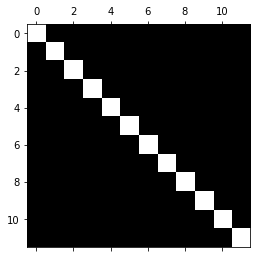

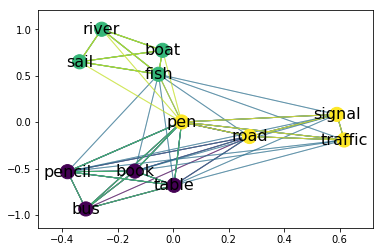

In [16]:
M, clusters = mcl_c.mcl(DM, expand_factor = 5, inflate_factor = 2, max_loop = 10, mult_factor = 5)
#5,2,10,5
print "Clusters",clusters
pos=mcl_c.draw(G,M,clusters,labels)
#MCL END

Clusters {0: [0, 1, 4, 5, 8, 11], 1: [0, 1, 4, 5, 8], 2: [2, 4, 6, 11], 3: [3, 7, 9, 10], 4: [0, 2, 4, 5, 6, 8, 10, 11], 5: [0, 1, 4, 5, 8], 6: [2, 4, 6, 11], 7: [3, 7, 9, 10], 8: [0, 1, 4, 5, 8], 9: [3, 7, 9, 10], 10: [3, 4, 7, 9, 10], 11: [2, 4, 6, 11]}


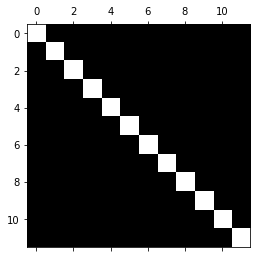

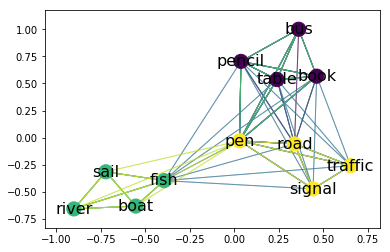

In [17]:
M, clusters = mcl_c.mcl(DM, expand_factor = 5, inflate_factor = 2, max_loop = 10, mult_factor = 5)
#5,2,10,5
print "Clusters",clusters
pos=mcl_c.draw(G,M,clusters,labels)
#MCL END

In [18]:
final={}
no=0
for k in clusters:
    t=[]
    for v in clusters[k]:
        t+=[labels[v]]
#     if len(t)==len(clusters[k]):
#         for i in t:
    final[no]=t
    no=no+1
print clusters            

{0: [0, 1, 4, 5, 8, 11], 1: [0, 1, 4, 5, 8], 2: [2, 4, 6, 11], 3: [3, 7, 9, 10], 4: [0, 2, 4, 5, 6, 8, 10, 11], 5: [0, 1, 4, 5, 8], 6: [2, 4, 6, 11], 7: [3, 7, 9, 10], 8: [0, 1, 4, 5, 8], 9: [3, 7, 9, 10], 10: [3, 4, 7, 9, 10], 11: [2, 4, 6, 11]}


In [19]:
keywords=['Education','Travel']

for l in final:
    keypoint=[]
    for k in keywords:
        point=0
        wordFromList1 = wordnet.synsets(k)
        for i in final[l]:
            wordFromList2 = wordnet.synsets(i)
            p=0
            for wl1 in wordFromList1:
                for wl2 in wordFromList2:
                    sim_p=wl1.wup_similarity(wl2)
                    if sim_p>p:
                        p=sim_p
            if len(wordFromList1)>0 or len(wordFromList1)>0: 
                point=point+p
        keypoint.append(point/float(len(wordFromList1)+len(wordFromList2)))
    print keypoint
    max_value = max(keypoint)
    max_index = keypoint.index(max_value)
    print final[l],keywords[max_index]
    

[0.32308612440191387, 0.23063211298505415]
['pencil', 'bus', 'pen', 'book', 'table', 'road'] Education
[0.13700159489633174, 0.11463046757164404]
['pencil', 'bus', 'pen', 'book', 'table'] Education
[0.246978021978022, 0.18983957219251338]
['signal', 'pen', 'traffic', 'road'] Education
[0.08401116427432216, 0.14306878306878307]
['sail', 'boat', 'river', 'fish'] Travel
[0.4302914191072086, 0.312450294803236]
['pencil', 'signal', 'pen', 'book', 'traffic', 'table', 'fish', 'road'] Education
[0.13700159489633174, 0.11463046757164404]
['pencil', 'bus', 'pen', 'book', 'table'] Education
[0.246978021978022, 0.18983957219251338]
['signal', 'pen', 'traffic', 'road'] Education
[0.08401116427432216, 0.14306878306878307]
['sail', 'boat', 'river', 'fish'] Travel
[0.13700159489633174, 0.11463046757164404]
['pencil', 'bus', 'pen', 'book', 'table'] Education
[0.08401116427432216, 0.14306878306878307]
['sail', 'boat', 'river', 'fish'] Travel
[0.09512227538543327, 0.1652910052910053]
['sail', 'pen', 'boa

Clusters {0: [0, 1, 5, 8], 1: [0, 1, 5, 8], 2: [2, 6, 11], 3: [3, 7, 9, 10], 4: [4, 11], 5: [0, 1, 5, 8], 6: [2, 4, 6, 11], 7: [3, 7, 9, 10], 8: [0, 1, 5, 8], 9: [3, 7, 9, 10], 10: [3, 7, 9, 10], 11: [2, 4, 6, 11]}


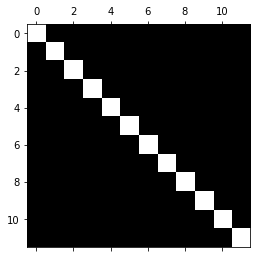

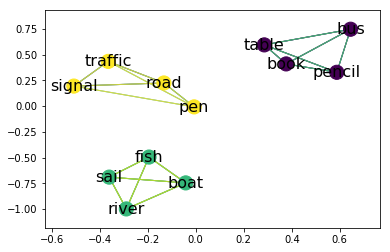

12


In [20]:
M, clusters = mcl_c.mcl(DM, expand_factor = 4, inflate_factor = 2, max_loop = 10, mult_factor = 6)
print "Clusters",clusters
pos=mcl_c.draw(G,M,clusters,labels)
print len(clusters)
no=0;